<a href="https://colab.research.google.com/github/Arif111866/Deep-Learning-AI/blob/main/10_classification_by_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


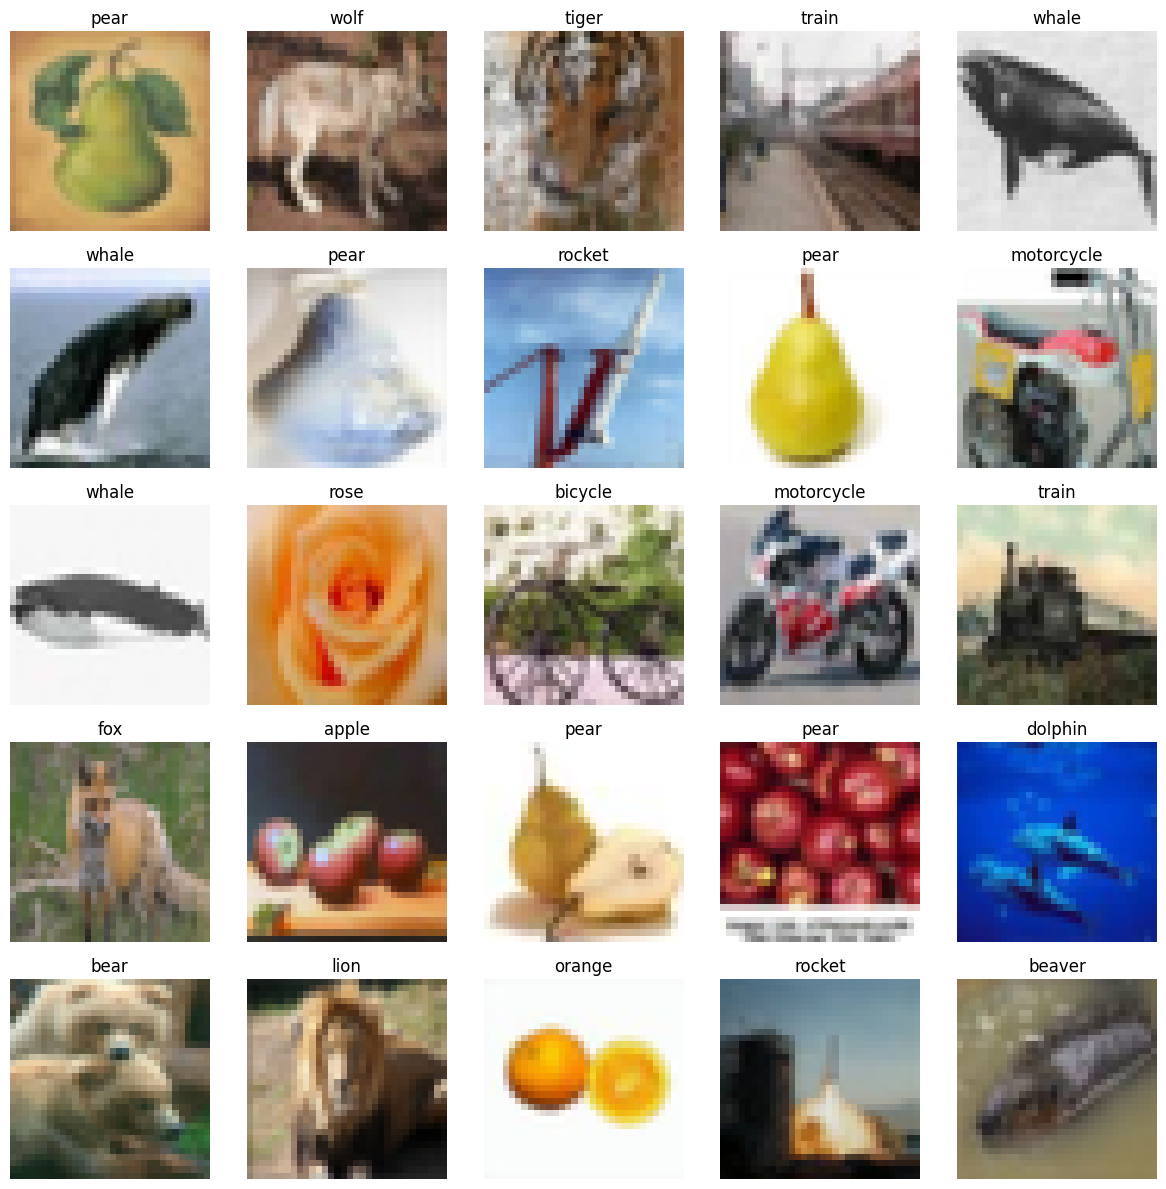

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-100 with fine labels
(trainX_all, trainY_all), (testX_all, testY_all) = cifar100.load_data(label_mode='fine')

# Define 20 selected class names
selected_classes = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale',
    'bear', 'tiger', 'lion', 'wolf', 'fox',
    'apple', 'orange', 'pear', 'rose', 'tulip',
    'bicycle', 'motorcycle', 'train', 'rocket', 'telephone'
]

# Full CIFAR-100 fine label names (in order)
all_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

# Get indices for selected classes
selected_indices = [all_fine_labels.index(cls) for cls in selected_classes]

# Filter function
def filter_data(X, Y, class_indices):
    mask = np.isin(Y.flatten(), class_indices)
    X_filtered = X[mask]
    Y_filtered = Y[mask]
    label_map = {orig: new for new, orig in enumerate(class_indices)}
    Y_remapped = np.array([label_map[y[0]] for y in Y_filtered]).reshape(-1, 1)
    return X_filtered, Y_remapped

# Apply filtering to training and test sets
trainX_filtered, trainY_filtered = filter_data(trainX_all, trainY_all, selected_indices)
testX_filtered, testY_filtered = filter_data(testX_all, testY_all, selected_indices)

#  Display function
def display_img(img_set, label_set, class_names, n=25):
    plt.figure(figsize=(12, 12))
    cnt = 1 ;
    for i in range(100 , 125):
        plt.subplot(5, 5, cnt)
        cnt += 1
        plt.imshow(img_set[i])
        plt.title(class_names[label_set[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show first 9 filtered images
display_img(trainX_filtered, trainY_filtered, selected_classes)


In [10]:
from tensorflow.image import resize

# Normalize to [0, 1]
trainX_filtered = trainX_filtered.astype('float32') / 255.0
testX_filtered = testX_filtered.astype('float32') / 255.0

# Resize to 96x96x3
trainX_filtered = resize(trainX_filtered, (96, 96))
testX_filtered = resize(testX_filtered, (96, 96))

# One-hot encode labels (20 classes)
trainY_filtered = to_categorical(trainY_filtered, num_classes=20)
testY_filtered = to_categorical(testY_filtered, num_classes=20)

# Final training data
trainX = trainX_filtered
trainY = trainY_filtered
testX = testX_filtered
testY = testY_filtered

# Print data shapes and types
print(f"trainX.shape: {trainX.shape}, testX.shape: {testX.shape}")
print(f"trainX.dtype: {trainX.dtype}, testX.dtype: {testX.dtype}")
print(f"trainY.shape: {trainY.shape}, testY.shape: {testY.shape}")
print(f"trainY.dtype: {trainY.dtype}, testY.dtype: {testY.dtype}")

# Check sample labels
print("Sample trainY (one-hot encoded):")
print(trainY[:5])


trainX.shape: (10000, 96, 96, 3), testX.shape: (2000, 96, 96, 3)
trainX.dtype: <dtype: 'float32'>, testX.dtype: <dtype: 'float32'>
trainY.shape: (10000, 20), testY.shape: (2000, 20)
trainY.dtype: float64, testY.dtype: float64
Sample trainY (one-hot encoded):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# model 1: ResNet50

In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load pre-trained ResNet50 without top layers
resnet_base = ResNet50(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze base model
for layer in resnet_base.layers:
    layer.trainable = False

x = resnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(20, activation='softmax')(x)

model_resnet = Model(inputs=resnet_base.input, outputs=outputs, name='ResNet50_CIFAR100_20')
# model_resnet.summary()


Load ResNet50 and Add a Custom Classification Head

In [15]:
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet_transfer = model_resnet.fit(trainX, trainY, batch_size=64,
                                           validation_split=0.1, epochs=10, verbose=1)

resnet_transfer_loss, resnet_transfer_acc = model_resnet.evaluate(testX, testY, verbose=0)
print(f"📊 ResNet50 Transfer Learning Accuracy: {resnet_transfer_acc:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.1292 - loss: 3.6277 - val_accuracy: 0.0640 - val_loss: 3.2598
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.2251 - loss: 2.8070 - val_accuracy: 0.0710 - val_loss: 3.0687
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.2483 - loss: 2.5990 - val_accuracy: 0.0690 - val_loss: 4.5545
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.2842 - loss: 2.4199 - val_accuracy: 0.1150 - val_loss: 4.5447
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.2955 - loss: 2.3120 - val_accuracy: 0.1500 - val_loss: 3.5659
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.3117 - loss: 2.2339 - val_accuracy: 0.1420 - val_loss: 3.5442
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.3169 - loss: 2.1812 - val_accuracy: 0.1670 - val_loss: 3.5793
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.3407 - loss: 2.1173 - v

fine tuning

In [16]:
import tensorflow as tf

# Unfreeze the last 40 layers
for layer in model_resnet.layers[-40:]:
    layer.trainable = True

# Compile the model with the Adam optimizer
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data with validation split
history_resnet_finetune = model_resnet.fit(
    trainX, trainY,
    batch_size=64,
    validation_split=0.1,
    epochs=20,
    verbose=1
)

# Evaluate the model on the test data
resnet_finetune_loss, resnet_finetune_acc = model_resnet.evaluate(testX, testY, verbose=0)

# Print the fine-tuning accuracy
print(f"📊 ResNet50 Fine-Tuning Accuracy: {resnet_finetune_acc:.4f}")


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - accuracy: 0.2180 - loss: 2.6514 - val_accuracy: 0.0680 - val_loss: 64.9713
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.3516 - loss: 2.0350 - val_accuracy: 0.0350 - val_loss: 28.1387
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.4043 - loss: 1.8420 - val_accuracy: 0.0680 - val_loss: 41.4761
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.4322 - loss: 1.7771 - val_accuracy: 0.0480 - val_loss: 26.2793
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.4484 - loss: 1.7054 - val_accuracy: 0.0670 - val_loss: 29.9205
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.4804 - loss: 1.6047 - val_accuracy: 0.1190 - val_loss: 25.9044
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4783 - loss: 1.5780 - val_accuracy: 0.1330 - val_loss: 28.0536
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4881 - loss: 1.55

# Model 2 :Mobile net

In [23]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Load pre-trained MobileNet with input shape 96x96x3
mobilenet = MobileNet(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze all layers in the MobileNet backbone
for layer in mobilenet.layers:
    layer.trainable = False

# Build classification head for 20 classes
inputs_mobilenet = mobilenet.input
x = mobilenet.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs_final = Dense(20, activation='softmax', name='OutputLayer')(x)

# Create the model
model = Model(inputs=inputs_mobilenet, outputs=outputs_final, name='MobileNet_CIFAR100_20Classes')

# Print model summary
# model.summary()


<ipython-input-23-293e43dc2d27>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(input_shape=(96, 96, 3), include_top=False, weights='imagenet')


In [24]:
import tensorflow as tf

# Compile the model for Transfer Learning
# (only the new classification head will be trained since MobileNet layers are frozen)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train only the classification head
history_transfer_learning = model.fit(
    trainX, trainY,
    batch_size=64,
    validation_split=0.1,
    epochs=12,
    verbose=1
)

# Evaluate on the test set
t_loss, t_acc = model.evaluate(testX, testY, verbose=0)
print(f"📊 Transfer Learning Test Accuracy: {t_acc:.4f}")


Epoch 1/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.4282 - loss: 2.1067 - val_accuracy: 0.6990 - val_loss: 0.9233
Epoch 2/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6739 - loss: 0.9736 - val_accuracy: 0.7120 - val_loss: 0.8382
Epoch 3/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7504 - loss: 0.7493 - val_accuracy: 0.7390 - val_loss: 0.7915
Epoch 4/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7808 - loss: 0.6419 - val_accuracy: 0.7270 - val_loss: 0.8308
Epoch 5/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8044 - loss: 0.5652 - val_accuracy: 0.7290 - val_loss: 0.8212
Epoch 6/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8315 - loss: 0.4890 - val_accuracy: 0.7320 - val_loss: 0.8320
Epoch 7/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8511 - loss: 0.4310 - val_accuracy: 0.7410 - val_loss: 0.8023
Epoch 8/12
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8654 - loss: 0.3895 - val_ac

## fine tune.

In [27]:
import tensorflow as tf


for layer in model.layers[-40:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)


finetune_loss, finetune_accuracy = model.evaluate(testX, testY, verbose=0)
print(f" Fine-Tuning ----------- Accuracy: {finetune_accuracy:.4f}")


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 97ms/step - accuracy: 0.6550 - loss: 1.2794 - val_accuracy: 0.6410 - val_loss: 1.2058
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8001 - loss: 0.5818 - val_accuracy: 0.7020 - val_loss: 1.1014
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8828 - loss: 0.3500 - val_accuracy: 0.7080 - val_loss: 1.0773
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9200 - loss: 0.2384 - val_accuracy: 0.6980 - val_loss: 1.2273
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9262 - loss: 0.2157 - val_accuracy: 0.7150 - val_loss: 0.9774
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9457 - loss: 0.1615 - val_accuracy: 0.7260 - val_loss: 1.0434
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9457 - loss: 0.1689 - val_accuracy: 0.7080 - val_loss: 1.1832
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9584 - loss: 0.1275 - val_acc

## Model 3: VGG16

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization


vgg_base = VGG16(input_shape=(96, 96, 3), include_top=False, weights='imagenet')


for layer in vgg_base.layers:
    layer.trainable = False


x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(20, activation='softmax', name='OutputLayer')(x)

# Final model
model_vgg16 = Model(inputs=vgg_base.input, outputs=outputs, name='VGG16_CIFAR100_20Classes')
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "VGG16_CIFAR100_20Classes"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 20)             │        20,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,264,596 (58.23 MB)

 Trainable params: 547,860 (2.09 MB)

 Non-trainable params: 14,716,736 (56.14 MB)

In [29]:
# Compile the model for transfer learning
model_vgg16.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train only the new head
history_vgg_transfer = model_vgg16.fit(
    trainX, trainY,
    batch_size= 128,
    validation_split=0.1,
    epochs=20,
    verbose=1
)

# Evaluate
vgg_transfer_loss, vgg_transfer_acc = model_vgg16.evaluate(testX, testY, verbose=0)
print(f"VGG16 Transfer Learning -------- Test Accuracy: {vgg_transfer_acc:.4f}")


Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 317ms/step - accuracy: 0.4001 - loss: 1.9269 - val_accuracy: 0.3160 - val_loss: 2.3148
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.6230 - loss: 1.1417 - val_accuracy: 0.4550 - val_loss: 1.9752
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.6622 - loss: 1.0309 - val_accuracy: 0.5040 - val_loss: 1.7272
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.6851 - loss: 0.9470 - val_accuracy: 0.5340 - val_loss: 1.5080
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - accuracy: 0.7137 - loss: 0.8712 - val_accuracy: 0.4980 - val_loss: 1.4965
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.7216 - loss: 0.8346 - val_accuracy: 0.5500 - val_loss: 1.4412
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.7257 - loss: 0.8214 - val_accuracy: 0.5530 - val_loss: 1.5214
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.7502 - loss: 0.7533 - val_accu

# Model 4: InceptionV3

In [36]:
from tensorflow.keras.applications import InceptionV3

inception_base = InceptionV3(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

for layer in inception_base.layers:
    layer.trainable = False

x = inception_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(20, activation='softmax')(x)

model_inception = Model(inputs=inception_base.input, outputs=outputs, name='InceptionV3_CIFAR100_20')
model_inception.summary()


Model: "InceptionV3_CIFAR100_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 47, 47,    │        864 │ input_layer_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 47,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 47, 47,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 45, 45,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 45,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 45, 45,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 45, 45,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 45,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 45, 45,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 22, 22,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 22, 22,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 22, 22,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 22, 22,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 20, 20,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 20,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 20, 20,    │          0 │ batch_normalizat

 Total params: 24,442,164 (93.24 MB)

 Trainable params: 2,636,308 (10.06 MB)

 Non-trainable params: 21,805,856 (83.18 MB)

In [38]:
model_inception.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='categorical_crossentropy', metrics=['accuracy'])

history_inception_transfer = model_inception.fit(trainX, trainY, batch_size=64,
                                                 validation_split=0.1, epochs=15, verbose=1)

inception_transfer_loss, inception_transfer_acc = model_inception.evaluate(testX, testY, verbose=0)
print(f" InceptionV3 Transfer -------- Accuracy: {inception_transfer_acc:.4f}")


Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 160ms/step - accuracy: 0.3307 - loss: 2.6351 - val_accuracy: 0.5070 - val_loss: 1.7662
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.5464 - loss: 1.5051 - val_accuracy: 0.5580 - val_loss: 1.4831
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6023 - loss: 1.2417 - val_accuracy: 0.5690 - val_loss: 1.4478
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6402 - loss: 1.1152 - val_accuracy: 0.5630 - val_loss: 1.3510
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6722 - loss: 0.9957 - val_accuracy: 0.5710 - val_loss: 1.4090
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7028 - loss: 0.8904 - val_accuracy: 0.5750 - val_loss: 1.4164
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7272 - loss: 0.8272 - val_accuracy: 0.5990 - val_loss: 1.3501
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7297 - loss: 0.7953 - val_a

In [39]:
inception_transfer_loss, inception_transfer_acc = model_inception.evaluate(testX, testY, verbose=0)

# Print the transfer learning accuracy
print(f"InceptionV3 Transfer Learning Accuracy: {inception_transfer_acc:.4f}")

InceptionV3 Transfer Learning Accuracy: 0.5975


# *Model 5: MobileNetV2*

In [40]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load MobileNetV2 base model
base_model = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(20, activation='softmax')(x)  # 20 classes

model_mobilenetv2 = Model(inputs=base_model.input, outputs=predictions)
model_mobilenetv2.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 4,930,644 (18.81 MB)

 Trainable params: 2,668,564 (10.18 MB)

 Non-trainable params: 2,262,080 (8.63 MB)

In [41]:
model_mobilenetv2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_mobilenetv2.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    verbose=1
)

transfer_loss, transfer_acc = model_mobilenetv2.evaluate(testX, testY, verbose=0)
print(f"MobileNetV2 Transfer  Learning -----------------Accuracy: {transfer_acc:.4f}")


Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.5634 - loss: 1.6284 - val_accuracy: 0.6550 - val_loss: 1.1140
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8035 - loss: 0.5892 - val_accuracy: 0.6630 - val_loss: 1.0396
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8612 - loss: 0.4132 - val_accuracy: 0.6970 - val_loss: 1.0068
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8971 - loss: 0.3165 - val_accuracy: 0.7300 - val_loss: 0.9565
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9196 - loss: 0.2444 - val_accuracy: 0.6980 - val_loss: 1.0648
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9363 - loss: 0.2046 - val_accuracy: 0.6940 - val_loss: 1.1825
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9508 - loss: 0.1609 - val_accuracy: 0.7020 - val_loss: 1.1026
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9611 - loss: 0.1304 - val_accuracy: 0.6940 -

In [42]:
# Evaluate the model on the test set
transfer_loss, transfer_acc = model_mobilenetv2.evaluate(testX, testY, verbose=0)

# Print the accuracy and loss
print(f"MobileNetV2 Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f"MobileNetV2 Transfer Learning Loss: {transfer_loss:.4f}")


MobileNetV2 Transfer Learning Accuracy: 0.7135
MobileNetV2 Transfer Learning Loss: 1.3233


### Model 6:DenseNet201

In [11]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load DenseNet201 base model
base_model = DenseNet201(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2024, activation='relu')(x)

predictions = Dense(20, activation='softmax')(x)  # 20-class output

model_densenet201 = Model(inputs=base_model.input, outputs=predictions)
model_densenet201.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 102, 102,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 48, 48,    │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 48, 48,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 48, 48,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 50, 50,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 24, 24,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 24, 24,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 24, 24,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 24, 24,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 24, 24,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 24, 24,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 24, 24,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 24, 24,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 24, 24,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 24, 24,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 24, 24,    │     12,288 │ conv2_block2_0_r

 Total params: 22,250,588 (84.88 MB)

 Trainable params: 3,928,604 (14.99 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [ ]:
import tensorflow as tf
model_densenet201.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_densenet201.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    verbose=1
)

transfer_loss, transfer_acc = model_densenet201.evaluate(testX, testY, verbose=0)
print(f" DenseNet121 Transfer Learning ----------- Accuracy: {transfer_acc:.4f}")


Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 452ms/step - accuracy: 0.5615 - loss: 1.5702 - val_accuracy: 0.7030 - val_loss: 0.8648
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 64s 65ms/step - accuracy: 0.8017 - loss: 0.5970 - val_accuracy: 0.7190 - val_loss: 0.8672
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8679 - loss: 0.3898 - val_accuracy: 0.7010 - val_loss: 0.8966
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9291 - loss: 0.2293 - val_accuracy: 0.7210 - val_loss: 0.9051
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9702 - loss: 0.1245 - val_accuracy: 0.7370 - val_loss: 0.9311
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9875 - loss: 0.0736 - val_accuracy: 0.7200 - val_loss: 1.0294
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9892 - loss: 0.0546 - val_accuracy: 0.7290 - val_loss: 1.0604
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.9982 - loss: 0.0238 - 

In [13]:
# Step 1: Evaluate the model on the test set after the first training
transfer_loss, transfer_acc = model_densenet201.evaluate(testX, testY, verbose=0)

# Step 2: Print the transfer learning accuracy and loss after evaluation
print(f"DenseNet121 Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f" DenseNet121 Transfer Learning Loss: {transfer_loss:.4f}")


DenseNet121 Transfer Learning Accuracy: 0.7350
 DenseNet121 Transfer Learning Loss: 1.2488


## Model 7 :NASNetMobile

In [14]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load NASNetMobile without the top layer
base_model = NASNetMobile(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2024, activation='relu')(x)

predictions = Dense(20, activation='softmax')(x)

# Final model
model_nasnet = Model(inputs=base_model.input, outputs=predictions)
model_nasnet.summary()


19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 47, 47,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 47, 47,    │        128 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 47, 47,    │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 47, 47,    │        352 │ activation[0][0]  │
│ (Conv2D)            │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 47, 47,    │         44 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 47, 47,    │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 47, 47,    │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 51, 51,    │          0 │ activation_1[0][… │
│ (ZeroPadding2D)     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 53, 53,    │          0 │ activation_3[0][… │
│ (ZeroPadding2D)     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 24, 24,    │        396 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 24, 24,    │      1,920 │ separable_conv_1… │
│ (SeparableConv2D)   │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 24, 24,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 24, 24,    │         44 │ separable_conv_1… │
│ (BatchNormalizatio… │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 24, 24,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 24, 24,    │          0 │ separable_conv_1… │
│ (Activation)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 24, 24,    │        396 │ activation_2[0][

 Total params: 6,449,584 (24.60 MB)

 Trainable params: 2,179,868 (8.32 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

In [15]:
model_nasnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer_nasnet = model_nasnet.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    verbose=1
)

# Evaluate
transfer_loss, transfer_acc = model_nasnet.evaluate(testX, testY, verbose=0)
print(f"NASNetMobile Transfer Learning ------------Accuracy: {transfer_acc:.4f}")


Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 76s 585ms/step - accuracy: 0.4562 - loss: 1.9074 - val_accuracy: 0.6320 - val_loss: 1.2103
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.7367 - loss: 0.8528 - val_accuracy: 0.6310 - val_loss: 1.1897
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8163 - loss: 0.6206 - val_accuracy: 0.6470 - val_loss: 1.1625
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8637 - loss: 0.4671 - val_accuracy: 0.6470 - val_loss: 1.2138
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9232 - loss: 0.3226 - val_accuracy: 0.6440 - val_loss: 1.2536
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9558 - loss: 0.2149 - val_accuracy: 0.6360 - val_loss: 1.3107
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9745 - loss: 0.1500 - val_accuracy: 0.6420 - val_loss: 1.3888
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9873 - loss: 0.1075 - val_accuracy: 0.6400 

In [16]:
transfer_loss, transfer_acc = model_nasnet.evaluate(testX, testY, verbose=0)

# Step 2: Print accuracy and loss
print(f"NASNetMobile Transfer Learning ------------ Accuracy: {transfer_acc:.4f}")
print(f"NASNetMobile Transfer Learning ------------ Loss: {transfer_loss:.4f}")

NASNetMobile Transfer Learning ------------ Accuracy: 0.6475
NASNetMobile Transfer Learning ------------ Loss: 1.7343


## Model 8: Xception

In [17]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load Xception base model
base_model = Xception(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2024, activation='relu')(x)
x = BatchNormalization()(x)

predictions = Dense(20, activation='softmax')(x)  # 20-class output

model_xception = Model(inputs=base_model.input, outputs=predictions)
model_xception.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 47, 47,    │        864 │ input_layer_3[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 47, 47,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 47, 47,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 45, 45,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 45, 45,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 45, 45,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 45, 45,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 45, 45,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 45, 45,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 45, 45,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 45, 45,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 23, 23,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 23, 23,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 23, 23,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 23, 23,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 23, 23,    │          0 │ add_4[0][0]     

 Total params: 25,057,252 (95.59 MB)

 Trainable params: 4,191,724 (15.99 MB)

 Non-trainable params: 20,865,528 (79.60 MB)

In [18]:
model_xception.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_xception.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=15,
    batch_size=32,
    verbose=1
)

transfer_loss, transfer_acc = model_xception.evaluate(testX, testY, verbose=0)
print(f"Xception Transfer Learning----------------- Accuracy: {transfer_acc:.4f}")


Epoch 1/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.5264 - loss: 1.8981 - val_accuracy: 0.6280 - val_loss: 1.3170
Epoch 2/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.7126 - loss: 0.8878 - val_accuracy: 0.6320 - val_loss: 1.3570
Epoch 3/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7785 - loss: 0.6640 - val_accuracy: 0.6370 - val_loss: 1.3043
Epoch 4/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8416 - loss: 0.4666 - val_accuracy: 0.6430 - val_loss: 1.2935
Epoch 5/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8883 - loss: 0.3314 - val_accuracy: 0.6710 - val_loss: 1.3554
Epoch 6/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9181 - loss: 0.2619 - val_accuracy: 0.6610 - val_loss: 1.3394
Epoch 7/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9371 - loss: 0.1922 - val_accuracy: 0.6500 - val_loss: 1.4271
Epoch 8/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9464 - loss: 0.1708 - val_

In [19]:
transfer_loss, transfer_acc = model_xception.evaluate(testX, testY, verbose=0)
print(f"Xception Transfer Learning----------------- Accuracy: {transfer_acc:.4f}")

Xception Transfer Learning----------------- Accuracy: 0.6445


## Model 10:DenseNet121

In [20]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load DenseNet121 base model
base_model = DenseNet121(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)

model_densenet = Model(inputs=base_model.input, outputs=predictions)
model_densenet.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_8    │ (None, 102, 102,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 48, 48,    │      9,408 │ zero_padding2d_8… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 48, 48,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 48, 48,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_9    │ (None, 50, 50,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 24, 24,    │          0 │ zero_padding2d_9… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 24, 24,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 24, 24,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 24, 24,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 24, 24,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 24, 24,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 24, 24,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 24, 24,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 24, 24,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 24, 24,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 24, 24,    │     12,288 │ conv2_block2_0_r

 Total params: 9,152,604 (34.91 MB)

 Trainable params: 2,115,100 (8.07 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [21]:
model_densenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_densenet.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    verbose=1
)

transfer_loss, transfer_acc = model_densenet.evaluate(testX, testY, verbose=0)
print(f"DenseNet121 Transfer Learning --------------------Accuracy: {transfer_acc:.4f}")


Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.5591 - loss: 1.5817 - val_accuracy: 0.6800 - val_loss: 0.9556
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.7618 - loss: 0.7071 - val_accuracy: 0.6960 - val_loss: 0.9235
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8222 - loss: 0.5315 - val_accuracy: 0.7100 - val_loss: 0.9178
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8705 - loss: 0.3792 - val_accuracy: 0.7250 - val_loss: 0.9414
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9096 - loss: 0.2639 - val_accuracy: 0.7290 - val_loss: 0.9964
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9403 - loss: 0.1852 - val_accuracy: 0.7290 - val_loss: 0.9872
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9591 - loss: 0.1398 - val_accuracy: 0.7310 - val_loss: 1.0883
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9729 - loss: 0.1033 - 

In [22]:
# Step 1: Evaluate the model on the test set
transfer_loss, transfer_acc = model_densenet.evaluate(testX, testY, verbose=0)

# Step 2: Print the results
print(f"DenseNet121 Transfer Learning -------------------- Accuracy: {transfer_acc:.4f}")
print(f"DenseNet121 Transfer Learning -------------------- Loss: {transfer_loss:.4f}")


DenseNet121 Transfer Learning -------------------- Accuracy: 0.7240
DenseNet121 Transfer Learning -------------------- Loss: 1.5834
